# Régression polynomiale simple

In [1]:
import pandas as pd 
import numpy as np

from sklearn.datasets import make_regression

import seaborn as sns
from matplotlib import pyplot as plt

## Création du dataset

In [2]:
x, y = make_regression (n_samples=200, n_features=1, noise=10)
y = y + abs(y/2)

y=y.reshape(y.shape[0], 1)

print(x.shape)
print(y.shape)
print(x)
print(y)

(200, 1)
(200, 1)
[[-1.24248086]
 [-1.32708645]
 [-0.56336479]
 [-0.95540022]
 [ 1.9973347 ]
 [ 0.81282309]
 [ 0.63209683]
 [-0.33956742]
 [-0.17527078]
 [ 0.89692517]
 [ 1.03869405]
 [ 0.00585701]
 [-0.36853003]
 [-0.29341081]
 [ 0.53077692]
 [ 0.21537104]
 [ 0.51682199]
 [ 0.37340367]
 [ 0.08390682]
 [ 0.85867266]
 [-0.54240939]
 [ 0.17681128]
 [ 0.05690405]
 [ 0.31732765]
 [ 0.66617322]
 [ 1.23765154]
 [ 0.67127431]
 [-0.23272412]
 [-0.36116134]
 [ 0.26192946]
 [ 1.62698121]
 [-1.75461684]
 [ 0.26544775]
 [-0.47558318]
 [-0.6346384 ]
 [-0.39946207]
 [ 2.1049088 ]
 [ 0.18354458]
 [-0.37766794]
 [-0.14423037]
 [ 0.38636563]
 [-1.68614978]
 [-0.74397793]
 [-0.40265222]
 [ 0.82783583]
 [ 2.104583  ]
 [-0.81878276]
 [-0.55962042]
 [ 1.11760696]
 [-0.17965557]
 [-1.24733839]
 [-0.84667184]
 [-1.81070657]
 [ 0.06652309]
 [-1.39919232]
 [-1.30490957]
 [-0.71909306]
 [-0.47585995]
 [-0.84414639]
 [-0.31815556]
 [ 0.3210289 ]
 [-0.51763606]
 [ 1.25140063]
 [-0.55207417]
 [-0.3915351 ]
 [-0.50

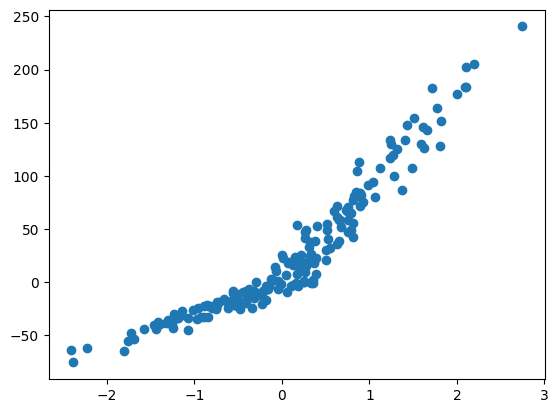

In [3]:
# Représentation graphique du modèle
plt.scatter(x,y)

## Modèle

In [4]:
#notre modèle qui calcule les y_predictions en fonction de x
def model(X, theta):
    return np.dot(X, theta)

## Fonction de coûts

In [5]:
def cout(X, y, theta):
    return (1/(2*len(y))) * np.sum((model(X, theta) - y)**2)


## Descente de Gradient (DG)

In [6]:
#Maintenant, on utilise la descente de gradients pour minimiser la fonction F et trouver les paramètres a, b optimaux
def gradient(X, y, theta):
    return (1/len(y)) * np.dot(X.T, (model(X, theta) - y))

def descenteGradient(X, y, theta, learning_rate, n_iterations):
    histCout=np.zeros(n_iterations)
    for iteration in range(0, n_iterations):
        theta = theta - learning_rate*gradient(X, y, theta)
        histCout[iteration]= cout(X,y,theta)

    return theta, histCout

def coefDet(y, y_predictions):
    u=((y-y_predictions)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

## Prédiction du modèle à l'aide d'une régression polynômiale 

In [7]:
#on va utiliser une régression polynomiale, car cette dernière imite de manière plus fidèle une courbe
#contrairement à un modèle de régression linéaire qui est plus efficace pour les fonctions affines.
theta_pol = np.random.randn(3,1)
print(theta_pol.shape)
print(theta_pol)

(3, 1)
[[-0.39260523]
 [ 0.20631417]
 [ 2.43579282]]


In [8]:
X_pol = np.hstack((x**2, x, np.ones(x.shape)))
print(X_pol.shape)
print(X_pol)

(200, 3)
[[ 1.54375868e+00 -1.24248086e+00  1.00000000e+00]
 [ 1.76115844e+00 -1.32708645e+00  1.00000000e+00]
 [ 3.17379884e-01 -5.63364787e-01  1.00000000e+00]
 [ 9.12789583e-01 -9.55400221e-01  1.00000000e+00]
 [ 3.98934589e+00  1.99733470e+00  1.00000000e+00]
 [ 6.60681374e-01  8.12823089e-01  1.00000000e+00]
 [ 3.99546406e-01  6.32096833e-01  1.00000000e+00]
 [ 1.15306034e-01 -3.39567421e-01  1.00000000e+00]
 [ 3.07198479e-02 -1.75270785e-01  1.00000000e+00]
 [ 8.04474768e-01  8.96925174e-01  1.00000000e+00]
 [ 1.07888533e+00  1.03869405e+00  1.00000000e+00]
 [ 3.43045785e-05  5.85701105e-03  1.00000000e+00]
 [ 1.35814384e-01 -3.68530031e-01  1.00000000e+00]
 [ 8.60899057e-02 -2.93410814e-01  1.00000000e+00]
 [ 2.81724141e-01  5.30776923e-01  1.00000000e+00]
 [ 4.63846843e-02  2.15371039e-01  1.00000000e+00]
 [ 2.67104964e-01  5.16821985e-01  1.00000000e+00]
 [ 1.39430303e-01  3.73403673e-01  1.00000000e+00]
 [ 7.04035387e-03  8.39068166e-02  1.00000000e+00]
 [ 7.37318739e-01  8.5

In [9]:
#on optimise le modèle avec la descente de gradient
resultDescenteGradientPol = descenteGradient(X_pol, y, theta_pol, 0.01, 1000)
newThetaPol = resultDescenteGradientPol[0]
varCoutPol = resultDescenteGradientPol[1]

print(newThetaPol.shape)
print(newThetaPol)

(3, 1)
[[13.41263007]
 [58.60706819]
 [ 9.24440298]]


[[-42.86789328]
 [-44.91047628]
 [-19.51585656]
 [-34.50589393]
 [179.80995441]
 [ 65.74305605]
 [ 51.6487133 ]
 [ -9.11009087]
 [ -0.61566989]
 [ 72.60068028]
 [ 84.58990591]
 [  9.58812534]
 [-10.53243358]
 [ -6.79685254]
 [ 44.13034396]
 [ 22.48880873]
 [ 43.11640439]
 [ 32.99862457]
 [ 14.25636516]
 [ 69.45807369]
 [-18.59851887]
 [ 20.02610236]
 [ 12.62281344]
 [ 29.19265533]
 [ 54.2392102 ]
 [102.32474743]
 [ 54.6296771 ]
 [ -3.66844054]
 [-10.17269405]
 [ 25.51552156]
 [140.10114339]
 [-52.29534644]
 [ 25.74660515]
 [-15.59447269]
 [-22.54774313]
 [-12.02664538]
 [192.03348645]
 [ 20.45326585]
 [-10.97652328]
 [  1.07049866]
 [ 33.89037571]
 [-51.44242909]
 [-26.93402924]
 [-12.17928918]
 [ 66.95327248]
 [191.99599703]
 [-29.75015691]
 [-19.35280855]
 [ 91.49705292]
 [ -0.85177542]
 [-42.99036168]
 [-30.76166449]
 [-52.9003698 ]
 [ 13.20248164]
 [-46.49972566]
 [-44.39364231]
 [-25.96393151]
 [-15.60716141]
 [-30.67092818]
 [ -8.04409534]
 [ 29.44126511]
 [-17.4988539 ]
 [103.58

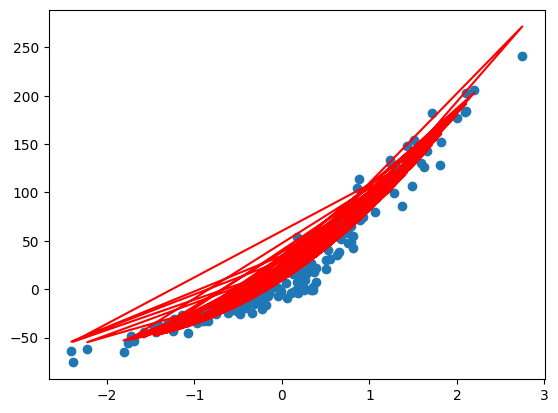

In [10]:
y_predictions_pol = model(X_pol, newThetaPol)
print(y_predictions_pol)
plt.scatter(x, y)
plt.plot(x, y_predictions_pol, c='red')

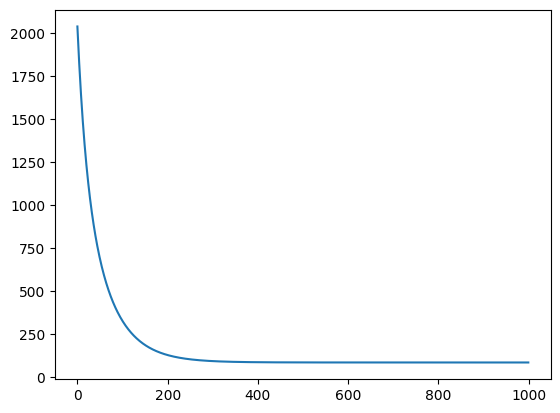

In [11]:
#on affiche la variation des couts au fil de la descente des gradients
plt.plot([i for i in range(1000)], varCoutPol)

In [12]:
#on calcule le coefficient de prédiction, plus le chiffre est proche de 1, mieux la prédiction est fidèle à la réalité
coeffPredictions_pol = coefDet(y, y_predictions_pol)
print(coeffPredictions_pol)

0.9542065516182697
